In [88]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from pandas.tseries.offsets import MonthEnd

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file2/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# EDA

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [93]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [94]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

dropping postal code column as we will use state and city parameters instead of it as it is having null values.

In [95]:
df.duplicated().sum()

0

In [96]:
df.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [97]:
# removing useless columns from data
df.drop(columns=['Postal Code','Row ID','Order ID','Customer ID','Country','Customer Name','Product ID','Product Name'],inplace=True)

In [98]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales
0,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600
1,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400
2,12/06/2017,16/06/2017,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200
3,11/10/2016,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775
4,11/10/2016,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680


#categorical analysis with sales-

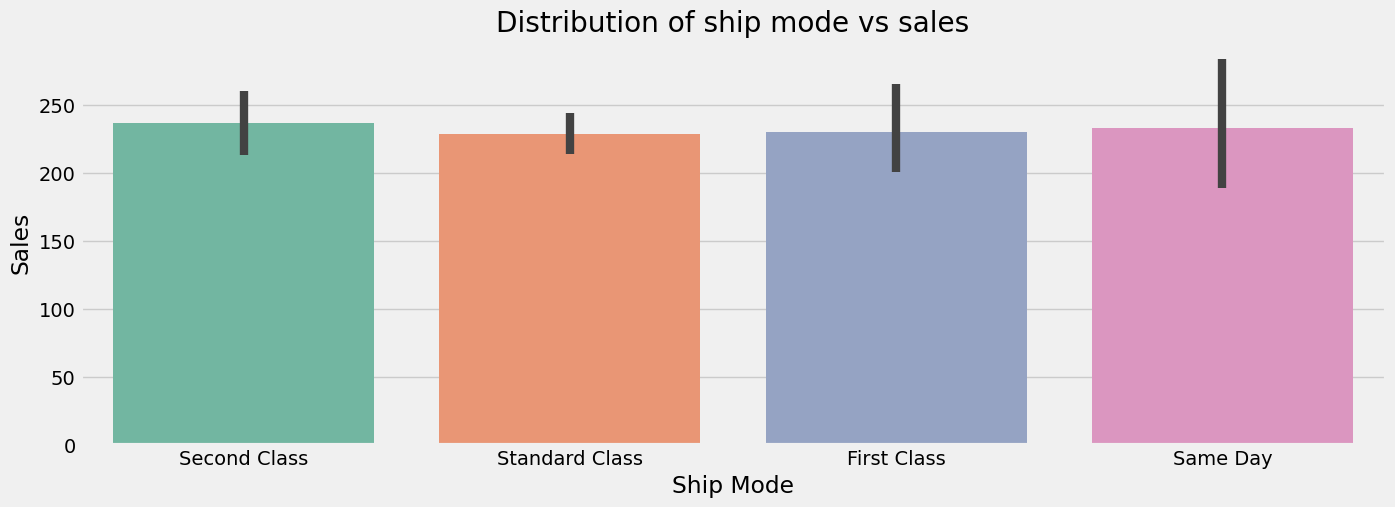

In [99]:
plt.figure(figsize = (15,5))
sns.barplot(data=df, x='Ship Mode',y='Sales',palette='Set2')
plt.title("Distribution of ship mode vs sales")
plt.show()

In [166]:
sns.barplot(data=df, x='Segment',y='Sales',palette='Set2')
plt.title("Distribution of Segments vs sales")
plt.figure(figsize = (8,5))
plt.show()

ValueError: Could not interpret value `Segment` for `x`. An entry with this name does not appear in `data`.

observation:

> The plot above depicts the sales distribution among different segments, highlighting home office comtribute more towards sales.


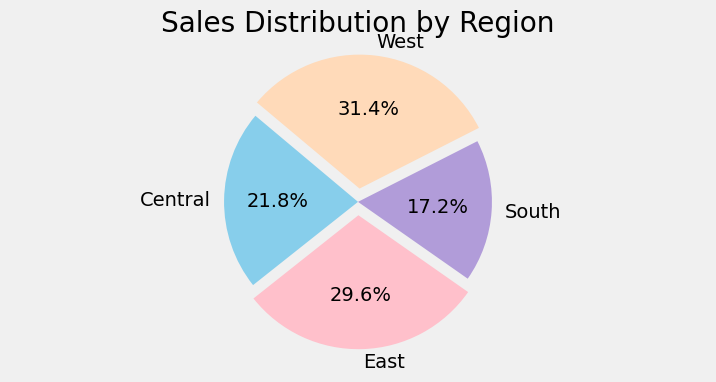

In [101]:
reg_s=df.groupby("Region")["Sales"].sum().reset_index()
sales=reg_s["Sales"].tolist()
regions=reg_s["Region"].tolist()

plt.figure(figsize=(8,4))
plt.pie(sales, labels=regions,
        autopct='%1.1f%%',
        colors=["#87CEEB", "#FFC0CB", "#B19CD9", "#FFDAB9"],
        explode = [0, 0.1, 0, 0.1],
        startangle=140)
plt.title('Sales Distribution by Region')
plt.axis('equal')
plt.show()

observation:

> The plot above depicts the sales distribution across different regions, highlighting west as the leader in terms of sales.


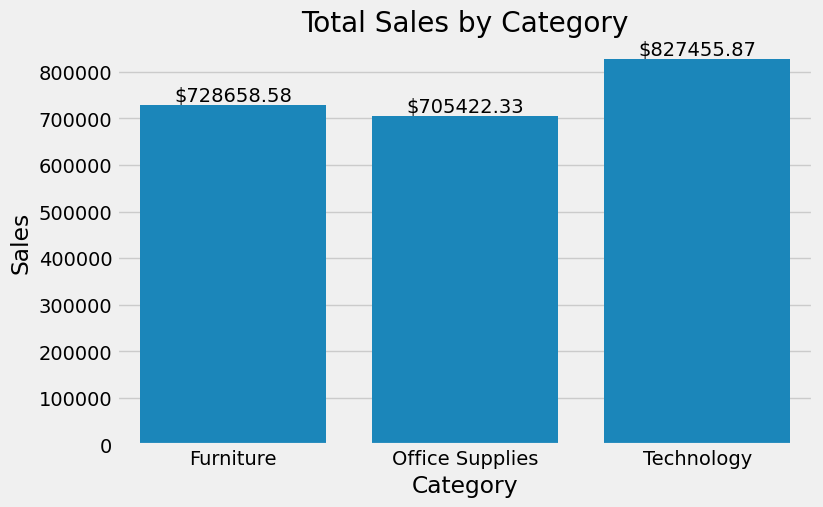

In [102]:
cat_s=df.groupby("Category")["Sales"].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=cat_s,x="Category",y="Sales")

for index, row in cat_s.iterrows():
    plt.annotate(f"${row['Sales']:.2f}", (index, row['Sales']), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Total Sales by Category')
plt.show()

observation:

> The plot above depicts the sales distribution among different categories, highlighting technology as the leader in terms of sales.




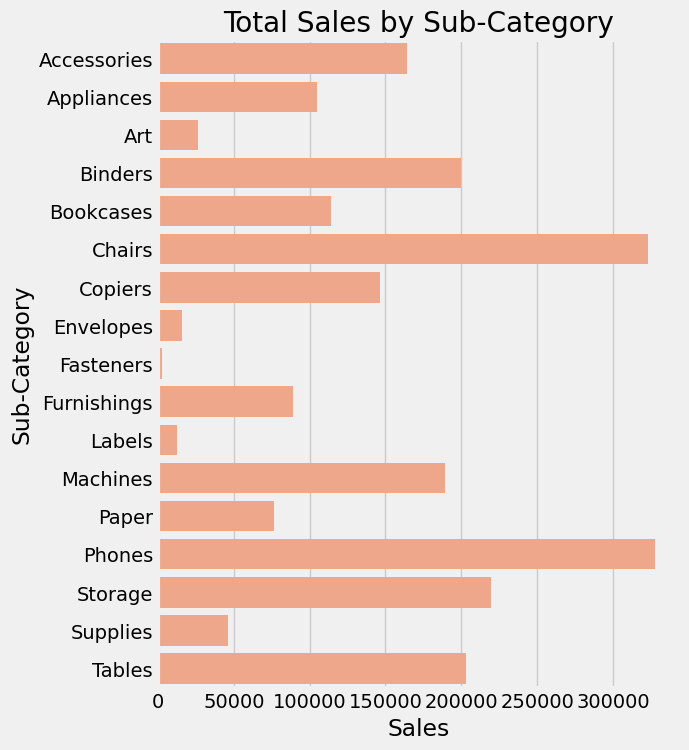

In [103]:
scat_s=df.groupby("Sub-Category")["Sales"].sum().reset_index()

plt.figure(figsize=(6,8))
sns.barplot(data=scat_s,y="Sub-Category",x="Sales",color="#FFA07A")
plt.xlabel('Sales')
plt.ylabel('Sub-Category')
plt.title('Total Sales by Sub-Category')
plt.show()

observation:

> Chairs and phones have high sales, both around $300,000.


In [ ]:
top_cities = df['City'].value_counts(ascending=False).head(20)
sns.barplot(x=top_cities.index, y=top_cities.values) # Use index for city names, values for counts
plt.title("Distribution of top Cities")
plt.xticks(rotation=90)
plt.figure(figsize = (8,5))
plt.show()

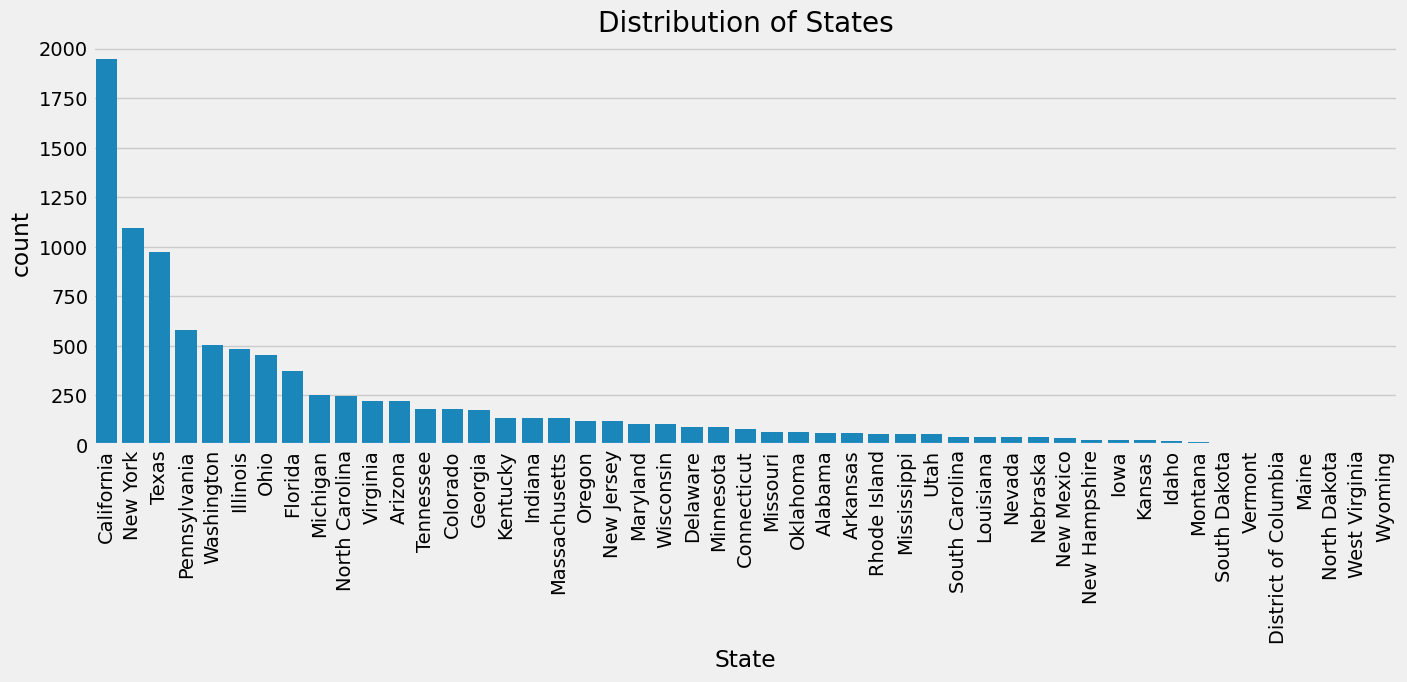

In [105]:
plt.figure(figsize = (15,5))
order= df['State'].value_counts().index
sns.countplot(data=df, x='State',order=order)
plt.title("Distribution of States")
plt.xticks(rotation=90)
plt.show()

converting string date into python date-time object-

In [106]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d/%m/%Y")
df["Leadtime"] = df["Ship Date"] - df["Order Date"]

df["order_year"]=df["Order Date"].dt.year
df["order_month"]=df["Order Date"].dt.month

In [107]:
df['Leadtime'].dt.days.describe()

count    9800.000000
mean        3.961122
std         1.749614
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Leadtime, dtype: float64

In [108]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Leadtime,order_year,order_month
0,2017-11-08,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,3 days,2017,11
1,2017-11-08,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3 days,2017,11
2,2017-06-12,2017-06-16,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,4 days,2017,6
3,2016-10-11,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,7 days,2016,10
4,2016-10-11,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,7 days,2016,10


time-series analysis-

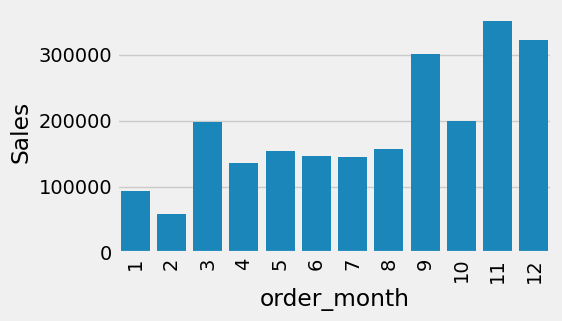

In [109]:
monthly_sales = pd.DataFrame(df.groupby('order_month')['Sales'].sum()).reset_index()
plt.figure(figsize=(5, 3))
sns.barplot(x = 'order_month', y = 'Sales',data = monthly_sales)
plt.xticks(rotation=90)
plt.show()

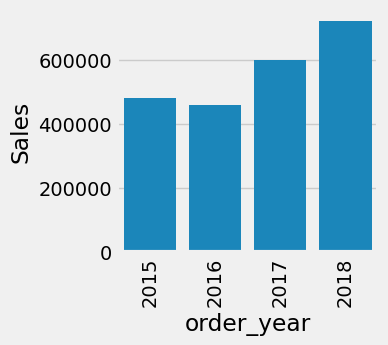

In [110]:
yearly_sales = pd.DataFrame(df.groupby('order_year')['Sales'].sum()).reset_index()
plt.figure(figsize=(3, 3))
sns.barplot(x = 'order_year', y = 'Sales',data = yearly_sales)
plt.xticks(rotation=90)
plt.show()

obeservation:

>we found maximum sales were in november month 2018 year.

#outliers treatment

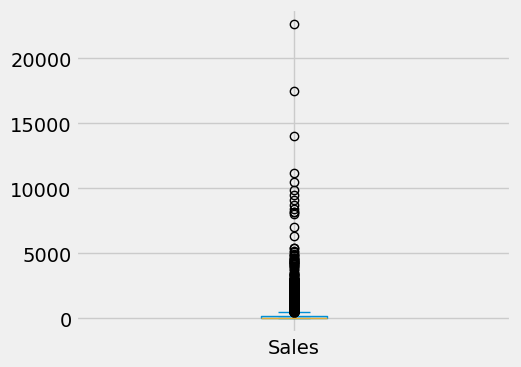

In [111]:
df['Sales'].plot.box(figsize=(5,4));


<Axes: >

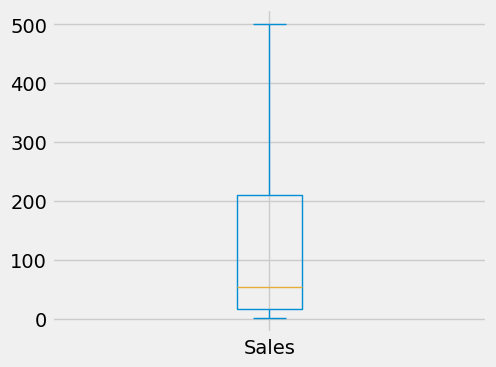

In [112]:
#using IQR method to remove outliers
IQR= df['Sales'].quantile(0.75) - df['Sales'].quantile(0.25)
lower_bridge= df['Sales'].quantile(0.25)-(IQR*1.5)
upper_bridge= df['Sales'].quantile(0.75)+(IQR*1.5)
df.loc[df['Sales']>upper_bridge,'Sales'] = upper_bridge
df['Sales'].plot.box(figsize=(5,4))

In [113]:
df["Year_Month"] = df["order_year"].astype(str) + "-" + df["order_month"].astype(str)


In [114]:
df["Year_Month"] = pd.to_datetime(df["Year_Month"],format="%Y-%m")

In [115]:
df.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Leadtime,order_year,order_month,Year_Month
0,2017-11-08,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,3 days,2017,11,2017-11-01
1,2017-11-08,2017-11-11,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,500.6405,3 days,2017,11,2017-11-01
2,2017-06-12,2017-06-16,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,4 days,2017,6,2017-06-01
3,2016-10-11,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,500.6405,7 days,2016,10,2016-10-01
4,2016-10-11,2016-10-18,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,7 days,2016,10,2016-10-01


# label encoding-

In [116]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ordinal_cols=[ 'Ship Mode', 'Segment', 'State', 'Category', 'Sub-Category', 'City', 'Region']
for column in ordinal_cols:
    df[column]=le.fit_transform(df[column])
df.drop(columns=['Ship Date'],inplace=True)
df.head()

,Order Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Leadtime,order_year,order_month,Year_Month
0,2017-11-08,2,0,194,15,2,0,4,261.9600,3 days,2017,11,2017-11-01
1,2017-11-08,2,0,194,15,2,0,5,500.6405,3 days,2017,11,2017-11-01
2,2017-06-12,2,1,265,3,3,1,10,14.6200,4 days,2017,6,2017-06-01
3,2016-10-11,3,0,153,8,2,0,16,500.6405,7 days,2016,10,2016-10-01
4,2016-10-11,3,0,153,8,2,1,14,22.3680,7 days,2016,10,2016-10-01


In [117]:
df.dtypes

Order Date       datetime64[ns]
Ship Mode                 int64
Segment                   int64
City                      int64
State                     int64
Region                    int64
Category                  int64
Sub-Category              int64
Sales                   float64
Leadtime        timedelta64[ns]
order_year                int32
order_month               int32
Year_Month       datetime64[ns]
dtype: object

#Time series forecasting using ARIMA model-

In [118]:
sales_trend = df[["Year_Month","Sales"]].groupby("Year_Month").sum()
sales_trend = sales_trend.sort_values(by="Year_Month")
sales_trend=sales_trend['Sales'].resample('MS').mean()
sales_trend.head()

Year_Month
2015-01-01     9912.7315
2015-02-01     3764.3125
2015-03-01    21980.1340
2015-04-01    18542.3085
2015-05-01    16460.4170
Freq: MS, Name: Sales, dtype: float64

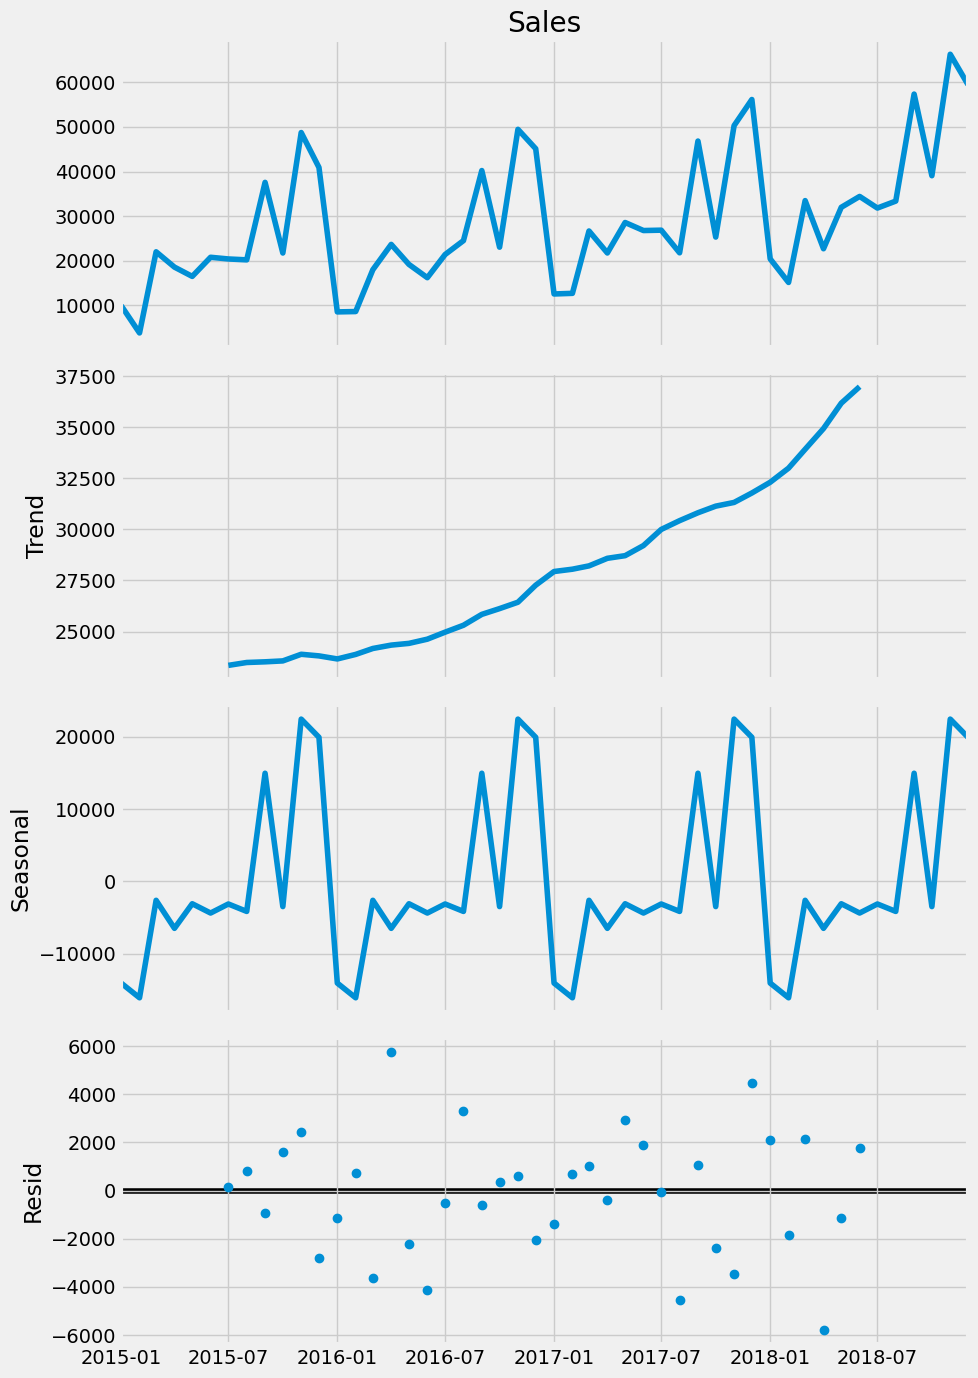

In [167]:
import statsmodels.api as sm
from pylab import rcParams as rc
rc['figure.figsize'] = 10,14
decomposition = sm.tsa.seasonal_decompose(sales_trend, model='additive')
fig = decomposition.plot()
plt.show()

In [120]:
print("Trend: ")
print(decomposition.trend)
print("Seasonality: ")
print(decomposition.seasonal)

Trend: 
Year_Month
2015-01-01             NaN
2015-02-01             NaN
2015-03-01             NaN
2015-04-01             NaN
2015-05-01             NaN
2015-06-01             NaN
2015-07-01    23348.064904
2015-08-01    23488.970217
2015-09-01    23521.714300
2015-10-01    23566.737237
2015-11-01    23891.075654
2015-12-01    23812.038463
2016-01-01    23662.678500
2016-02-01    23884.080133
2016-03-01    24174.388150
2016-04-01    24339.385700
2016-05-01    24424.072579
2016-06-01    24629.451042
2016-07-01    24972.289583
2016-08-01    25310.291375
2016-09-01    25842.837479
2016-10-01    26124.905542
2016-11-01    26436.853208
2016-12-01    27269.918292
2017-01-01    27938.685375
2017-02-01    28052.368963
2017-03-01    28214.286571
2017-04-01    28584.899633
2017-05-01    28714.182392
2017-06-01    29209.016775
2017-07-01    29997.173546
2017-08-01    30426.828771
2017-09-01    30812.476675
2017-10-01    31136.056233
2017-11-01    31317.816713
2017-12-01    31778.946738
2018-01-0

In [121]:
p=d=q=range(0,2)
import itertools
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [122]:
best_score,best_cfg,best_seasonal=float('inf'),None,None
for param in pdq:
    for param_seasonal in seasonal_pdq:
      try:
        mod = sm.tsa.statespace.SARIMAX(sales_trend,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
        results = mod.fit()
        if results.aic<best_score:
          best_score,best_cfg,best_seasonal=results.aic,param,param_seasonal
        # print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
      except:
        continue
print('Best ARIMA%sx%s12 - AIC=%.2f' % (best_cfg,best_seasonal, best_score))

Best ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC=421.91


In [123]:
mod =sm.tsa.statespace.SARIMAX(sales_trend,order=(0,1,1),seasonal_order=(0,1,1,12),enforce_stationarity=False,enforce_invertibility=False)
results= mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8236      0.136     -6.052      0.000      -1.090      -0.557
ma.S.L12      -0.2315      0.194     -1.196      0.232      -0.611       0.148
sigma2      2.428e+07   1.27e-09   1.91e+16      0.000    2.43e+07    2.43e+07


Year_Month
2017-01-01    17358.609576
2017-02-01    15074.477902
2017-03-01    25164.552114
2017-04-01    29239.245477
2017-05-01    24098.534154
2017-06-01    23423.981920
2017-07-01    27999.758693
2017-08-01    30211.681107
2017-09-01    43958.245389
2017-10-01    28420.707601
2017-11-01    53013.253256
2017-12-01    47662.168098
2018-01-01    18490.104478
2018-02-01    18612.988720
2018-03-01    31187.410358
2018-04-01    28677.631400
2018-05-01    31994.761136
2018-06-01    30263.525103
2018-07-01    31980.455204
2018-08-01    28600.403005
2018-09-01    52252.026614
2018-10-01    32877.145441
2018-11-01    59016.089700
2018-12-01    63679.355879
Freq: MS, Name: predicted_mean, dtype: float64


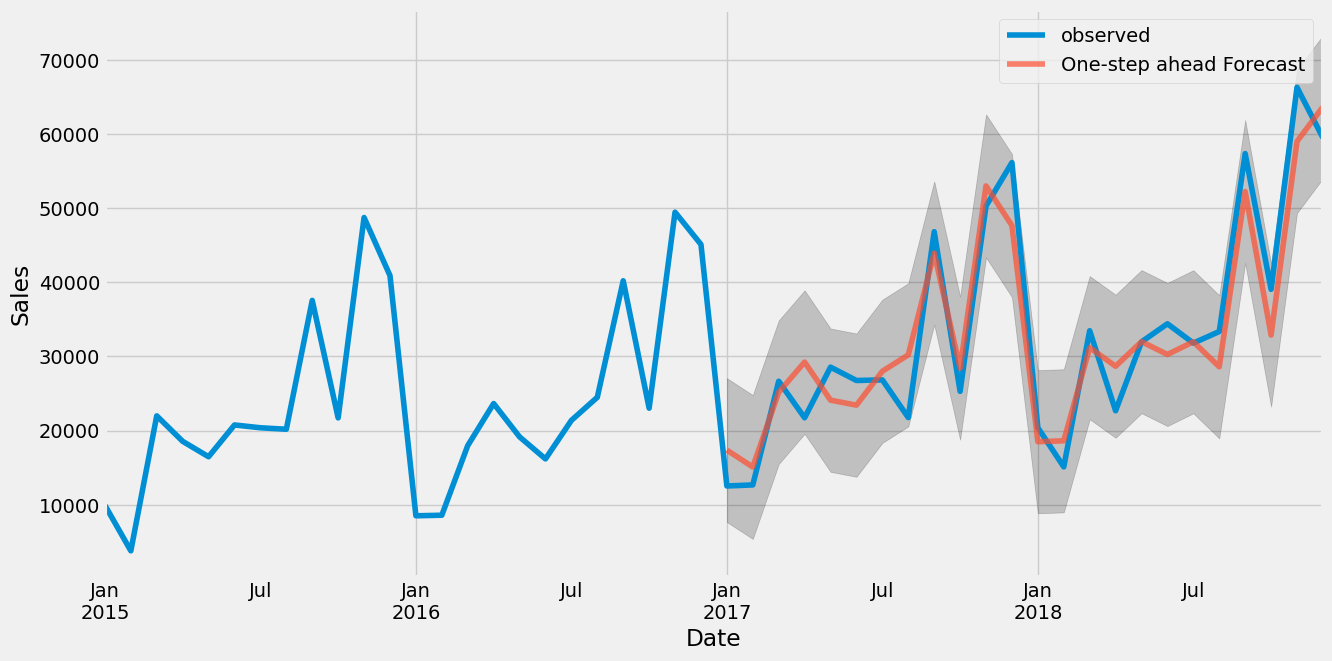

In [124]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
print(pred.predicted_mean)
pred_ci = pred.conf_int()

ax = sales_trend['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14,7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

 Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation." indicates that the time series data you're using (likely sales_trend) is not long enough to support the complexity of the SARIMAX model you've defined with order=(0,1,1) and seasonal_order=(0,1,1,12).
If you want to simplify the model, try reducing the order and seasonal_order parameters:



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.434e+07   9.65e+06      3.557      0.000    1.54e+07    5.33e+07


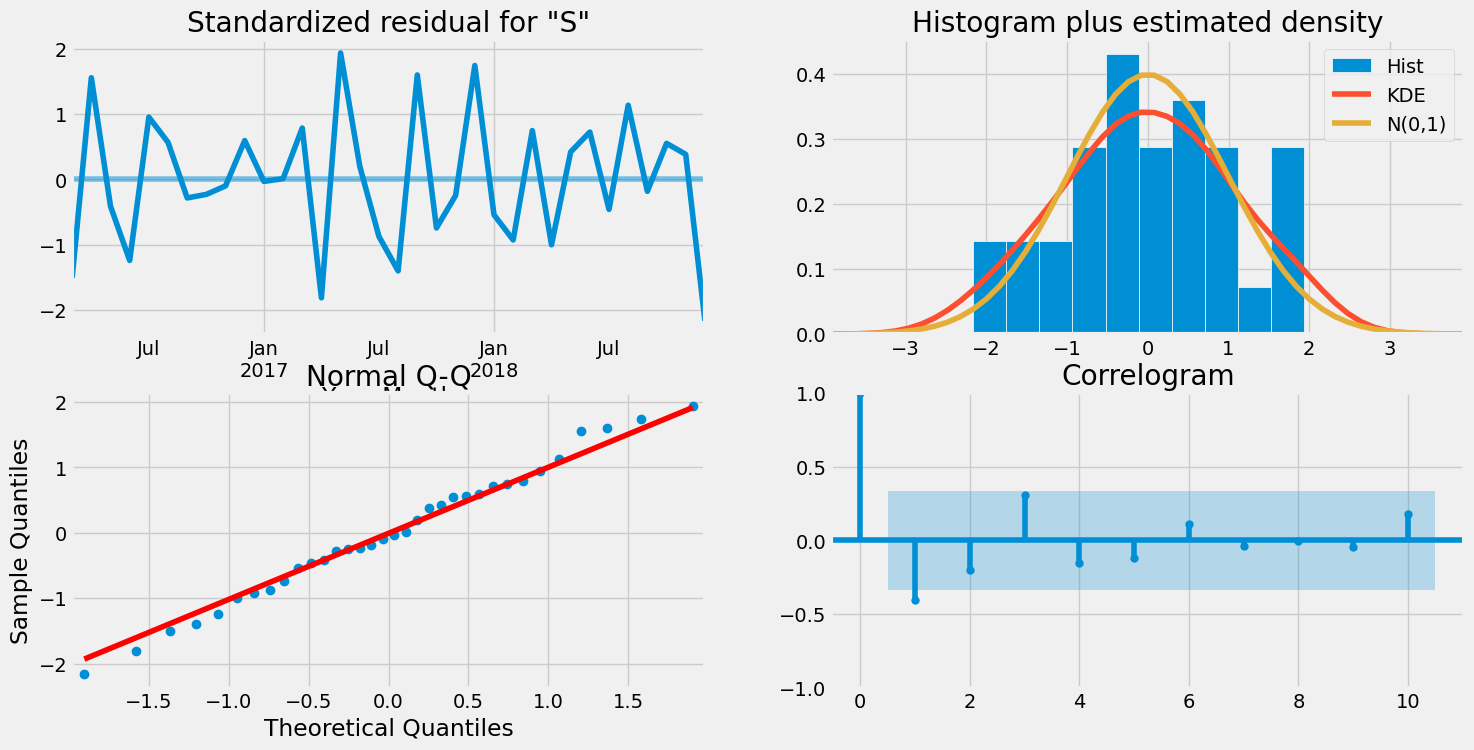

In [125]:
mod =sm.tsa.statespace.SARIMAX(sales_trend,order=(0,1,0),seasonal_order=(0,1,0,12),enforce_stationarity=False,enforce_invertibility=False)
results= mod.fit()
print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16,8))
plt.show()

calculating Root Mean Square error-

In [126]:
sales_trend_forecasted = pred.predicted_mean
sales_trend_truth = sales_trend['2017-01-01':]
mse = ((sales_trend_forecasted - sales_trend_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 4664.4


#time-series forecasting using Prophet-

In [127]:
import io, os, sys, setuptools, tokenize

In [128]:
# Install the fbprophet library
!pip install prophet

In [129]:
# Import the necessary modules
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()
plt.style.use('fivethirtyeight')

Output hidden; open in https://colab.research.google.com to view.

In [130]:
# Convert the sales_trend Series to a DataFrame
new_df = sales_trend.reset_index() # sales_trend is already a DataFrame. Removing .to_frame()

# Now you can rename the columns
new_df= new_df.rename({'Year_Month': 'ds', 'Sales': 'y'}, axis=1)

new_df.head()

,ds,y
0,2015-01-01,9912.7315
1,2015-02-01,3764.3125
2,2015-03-01,21980.1340
3,2015-04-01,18542.3085
4,2015-05-01,16460.4170


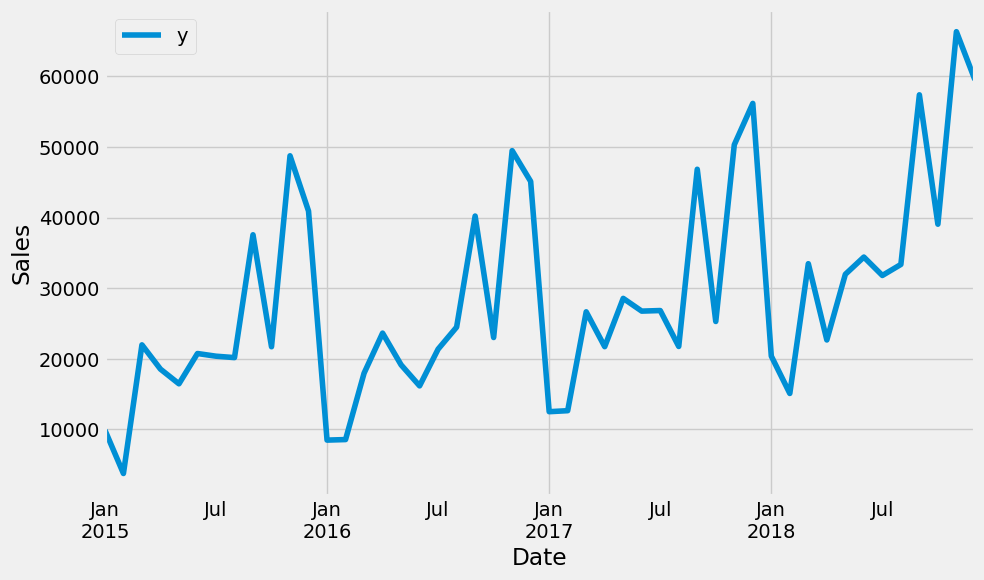

In [131]:
ax = new_df.set_index('ds').plot(figsize=(10, 6))
ax.set_ylabel('Sales')
ax.set_xlabel('Date')

plt.show()

In [132]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [133]:
my_model.fit(new_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpclujv8vt/ujygmvg0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpclujv8vt/4o2ea3a3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49491', 'data', 'file=/tmp/tmpclujv8vt/ujygmvg0.json', 'init=/tmp/tmpclujv8vt/4o2ea3a3.json', 'output', 'file=/tmp/tmpclujv8vt/prophet_modelt95vhol0/prophet_model-20240705155759.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:57:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:57:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [134]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

,ds
0,2015-01-01
1,2015-02-01
2,2015-03-01
3,2015-04-01
4,2015-05-01


In [135]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-01,8014.569874,3667.852994,12458.224455
1,2015-02-01,5051.802589,692.570425,9271.400380
2,2015-03-01,22733.819021,18294.069535,26968.366620
3,2015-04-01,14075.360805,9887.801758,18192.487448
4,2015-05-01,17579.228851,13499.639161,21947.491718


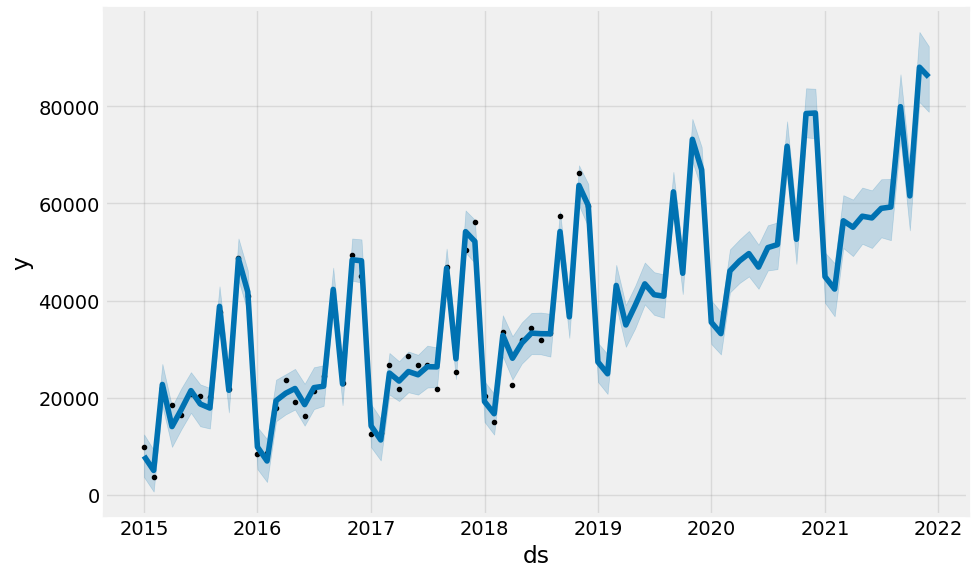

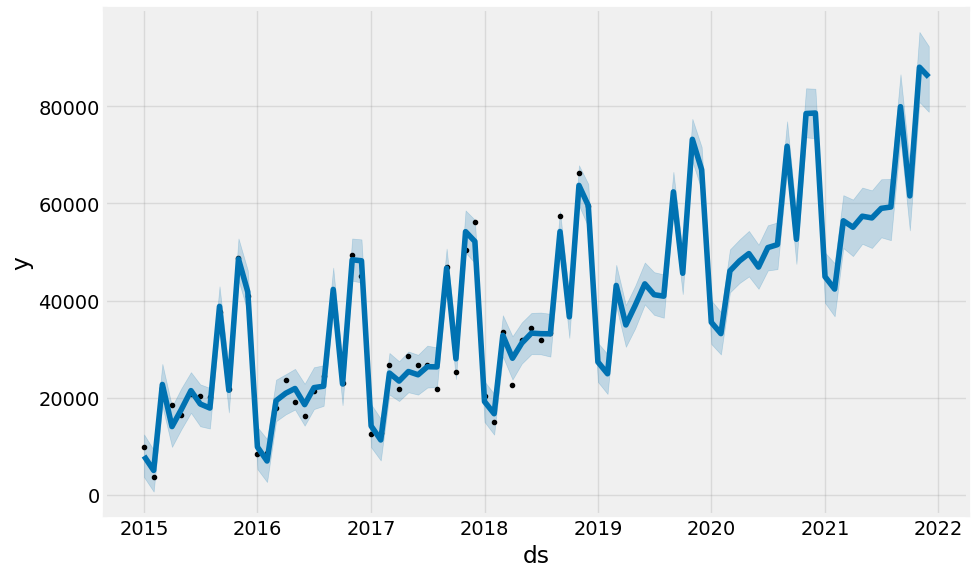

In [136]:
my_model.plot(forecast, uncertainty=True)


Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

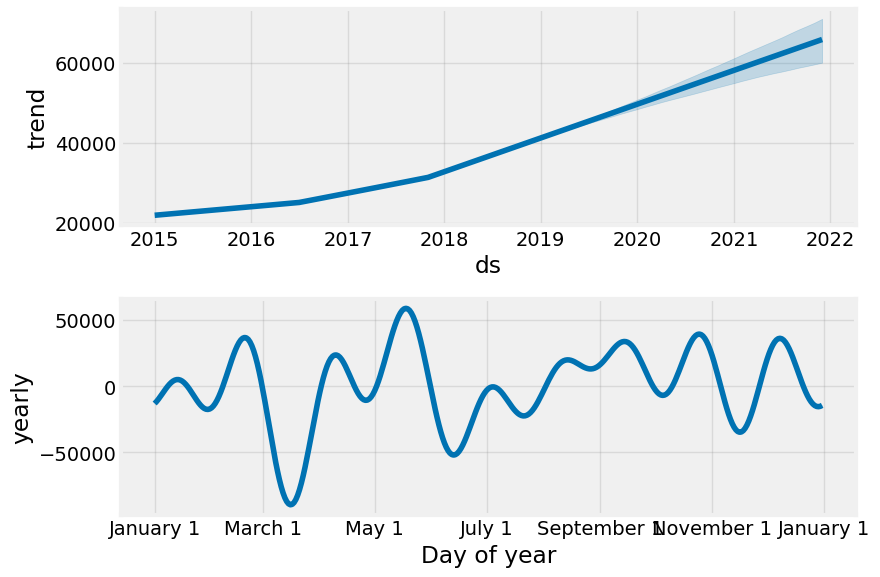

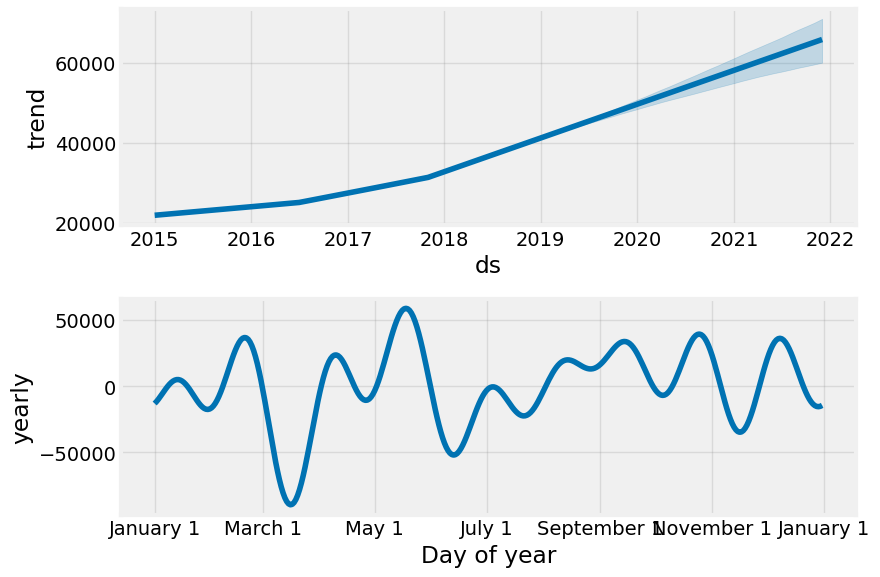

In [137]:
my_model.plot_components(forecast)



*   The first plot shows that the sales has been linearly increasing over time.




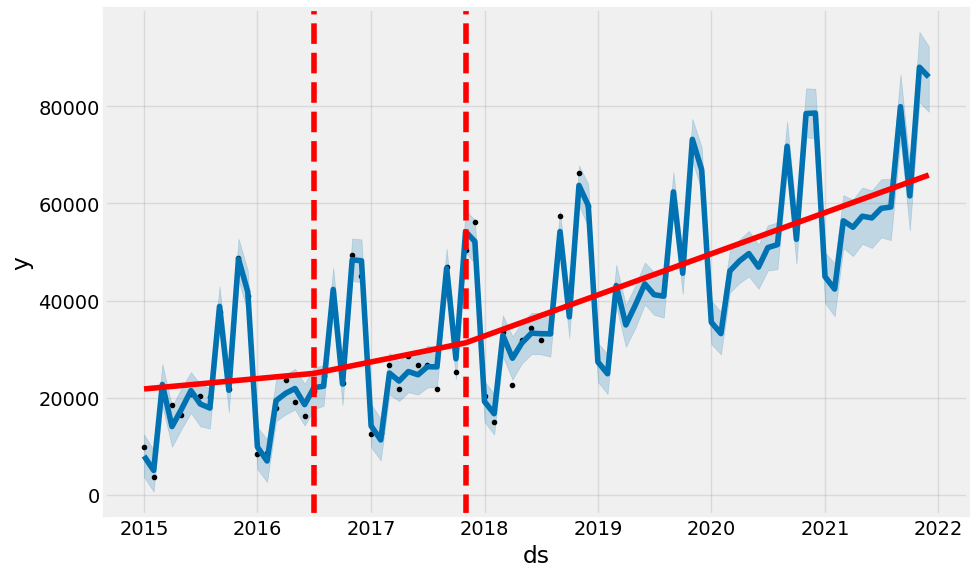

In [138]:
# Adding ChangePoints to Prophet
# Let’s plot the vertical lines where the potential changepoints occurred.

from prophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

In [139]:
# my_model.changepoints

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpclujv8vt/6vqs07t5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpclujv8vt/6s65sf0c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75724', 'data', 'file=/tmp/tmpclujv8vt/6vqs07t5.json', 'init=/tmp/tmpclujv8vt/6s65sf0c.json', 'output', 'file=/tmp/tmpclujv8vt/prophet_modeld5jinaxj/prophet_model-20240705155802.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:58:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:58:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


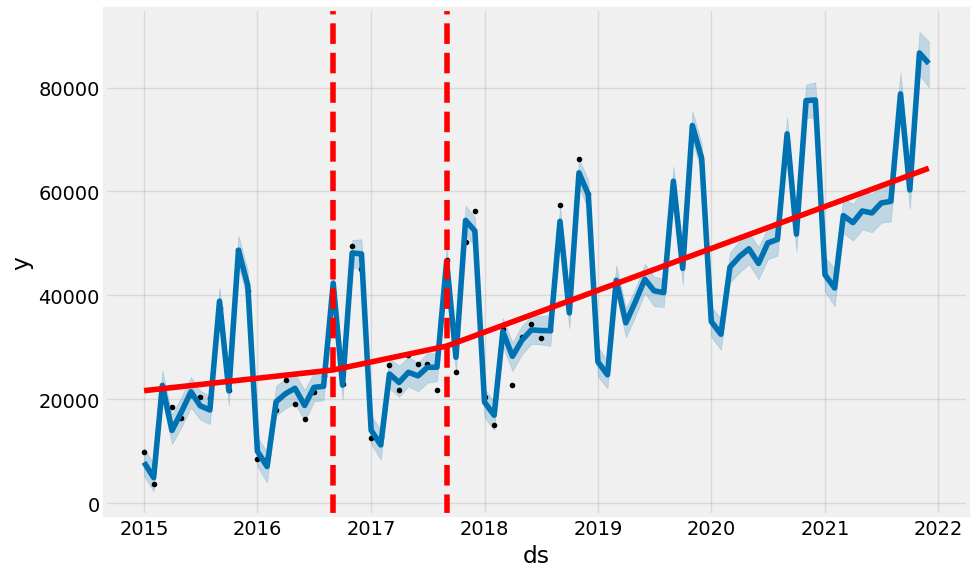

In [140]:
# We can change the inferred changepoint range by setting the changepoint_range
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(new_df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpclujv8vt/o4bmu6eu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpclujv8vt/zjdensv1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20098', 'data', 'file=/tmp/tmpclujv8vt/o4bmu6eu.json', 'init=/tmp/tmpclujv8vt/zjdensv1.json', 'output', 'file=/tmp/tmpclujv8vt/prophet_modelenyx8m7r/prophet_model-20240705155803.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:58:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:58:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


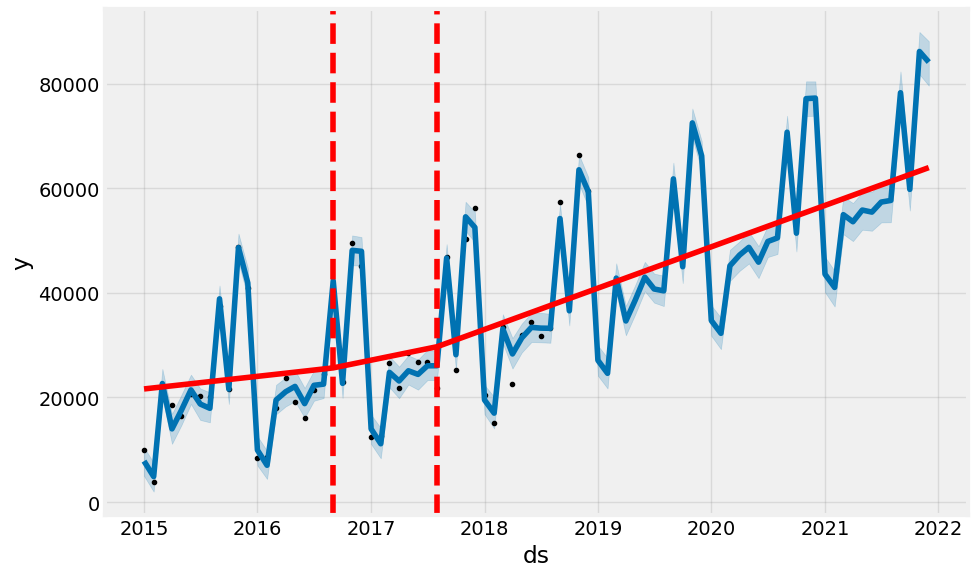

In [141]:
# The number of changepoints can be set by using the n_changepoints parameter when initializing prophet.

pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(new_df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpclujv8vt/k51g4qrc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpclujv8vt/lth79bwo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43833', 'data', 'file=/tmp/tmpclujv8vt/k51g4qrc.json', 'init=/tmp/tmpclujv8vt/lth79bwo.json', 'output', 'file=/tmp/tmpclujv8vt/prophet_model4r5le5mv/prophet_model-20240705155804.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:58:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:58:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


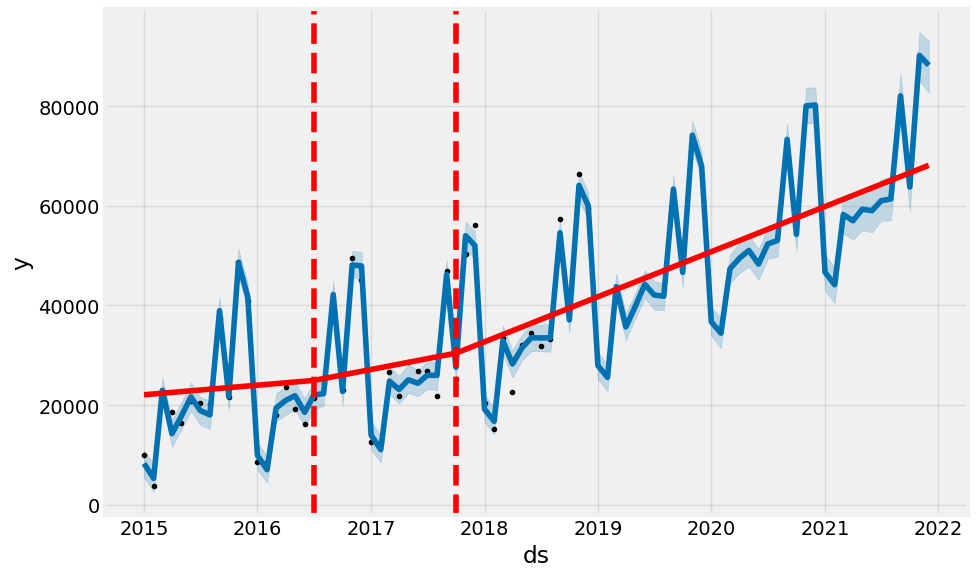

In [142]:
#adjusting trends

pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(new_df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpclujv8vt/p20frqwa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpclujv8vt/bzll5qnx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=289', 'data', 'file=/tmp/tmpclujv8vt/p20frqwa.json', 'init=/tmp/tmpclujv8vt/bzll5qnx.json', 'output', 'file=/tmp/tmpclujv8vt/prophet_modelxcw_ebji/prophet_model-20240705155805.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:58:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:58:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


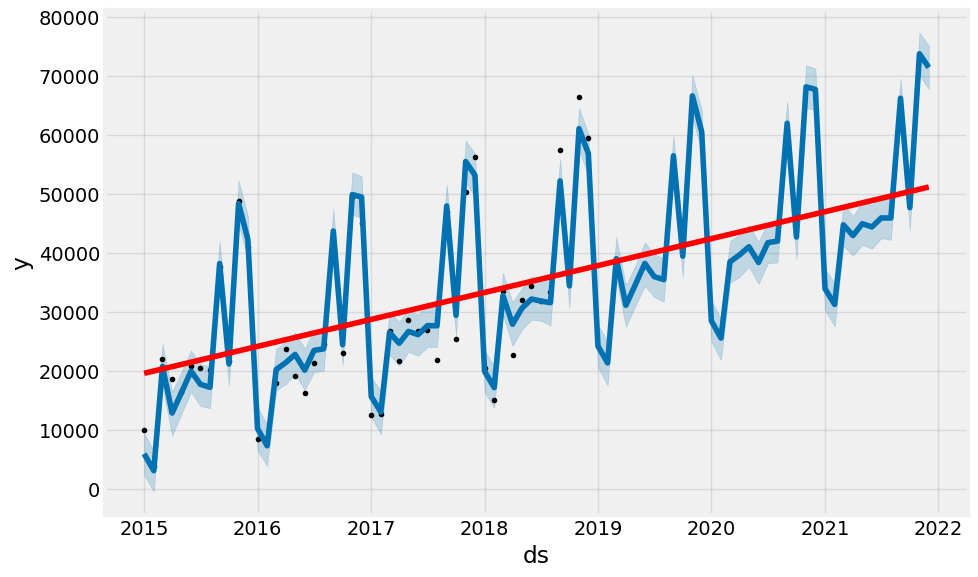

In [143]:
# Decreasing the changepoint_prior_scale to 0.001 to make the trend less flexible.
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(new_df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

# keras

In [144]:

# !pip install tensorflow

In [145]:
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [146]:
new_df.rename({'ds':'date','y':'sales'},axis=1,inplace=True)
new_df.head()

,date,sales
0,2015-01-01,9912.7315
1,2015-02-01,3764.3125
2,2015-03-01,21980.1340
3,2015-04-01,18542.3085
4,2015-05-01,16460.4170


In [147]:
df.drop(columns=['Leadtime','Order Date','Year_Month'],inplace=True)
df.head()
# 'order_year','order_month',

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,order_year,order_month
0,2,0,194,15,2,0,4,261.9600,2017,11
1,2,0,194,15,2,0,5,500.6405,2017,11
2,2,1,265,3,3,1,10,14.6200,2017,6
3,3,0,153,8,2,0,16,500.6405,2016,10
4,3,0,153,8,2,1,14,22.3680,2016,10


In [148]:
for i in range(1,13):
  col_name = 'month_' + str(i)
  df[col_name] = df['Sales'].shift(i)
df= df.dropna().reset_index(drop=True)
df.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,order_year,order_month,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3,0,96,31,2,1,12,15.5520,2018,4,...,114.9000,18.5040,500.6405,7.2800,48.8600,22.3680,500.6405,14.6200,500.6405,261.9600
1,3,0,450,45,3,1,3,407.9760,2017,12,...,500.6405,114.9000,18.5040,500.6405,7.2800,48.8600,22.3680,500.6405,14.6200,500.6405
2,3,2,154,41,0,1,1,68.8100,2016,11,...,500.6405,500.6405,114.9000,18.5040,500.6405,7.2800,48.8600,22.3680,500.6405,14.6200
3,3,2,154,41,0,1,3,2.5440,2016,11,...,15.5520,500.6405,500.6405,114.9000,18.5040,500.6405,7.2800,48.8600,22.3680,500.6405
4,3,0,271,47,0,1,14,500.6405,2015,11,...,407.9760,15.5520,500.6405,500.6405,114.9000,18.5040,500.6405,7.2800,48.8600,22.3680
5,2,0,511,42,3,1,14,55.5000,2015,5,...,68.8100,407.9760,15.5520,500.6405,500.6405,114.9000,18.5040,500.6405,7.2800,48.8600
6,2,0,436,3,3,1,2,8.5600,2015,8,...,2.5440,68.8100,407.9760,15.5520,500.6405,500.6405,114.9000,18.5040,500.6405,7.2800
7,2,0,436,3,3,2,13,213.4800,2015,8,...,500.6405,2.5440,68.8100,407.9760,15.5520,500.6405,500.6405,114.9000,18.5040,500.6405
8,2,0,436,3,3,1,3,22.7200,2015,8,...,55.5000,500.6405,2.5440,68.8100,407.9760,15.5520,500.6405,500.6405,114.9000,18.5040
9,3,1,158,25,0,1,2,19.4600,2017,12,...,8.5600,55.5000,500.6405,2.5440,68.8100,407.9760,15.5520,500.6405,500.6405,114.9000


In [149]:
df.drop(columns=['Ship Mode','Segment','City','State','Region','Category','Sub-Category'],inplace=True)


split train and test data-

In [150]:
train_data, test_data = train_test_split(df, train_size=0.8, random_state=42)  # Adjust random_state as needed

print(train_data.shape)
print(test_data.shape)

(7830, 15)
(1958, 15)


In [151]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data= scaler.transform(train_data)
test_data= scaler.transform(test_data)

In [152]:
    y = df['Sales']
    X = df.drop('Sales', axis=1)

In [153]:
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)


In [154]:
# X_train.head()

In [155]:
# y_train

In [156]:
import tensorflow as tf
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(256, activation='relu')(inputs)
x = tf.keras.layers.Dense(256, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "functional_335"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_112 (InputLayer)         │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_337 (Dense)                    │ (None, 256)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_338 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_339 (Dense)                    │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,889 (273.00 KB)

 Trainable params: 69,889 (273.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [157]:
model.compile(
    optimizer='adam',
    loss='mse'
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)


Epoch 1/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 30870.2324 - val_loss: 31444.4297 - learning_rate: 0.0010
Epoch 2/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 30180.9570 - val_loss: 28851.8691 - learning_rate: 0.0010
Epoch 3/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 28811.1523 - val_loss: 28193.9375 - learning_rate: 0.0010
Epoch 4/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 29212.8730 - val_loss: 28145.7207 - learning_rate: 0.0010
Epoch 5/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 28451.5566 - val_loss: 28247.1777 - learning_rate: 0.0010
Epoch 6/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 28449.5879 - val_loss: 28444.8867 - learning_rate: 0.0010
Epoch 7/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 27580.9043 - val_loss: 28587.2207 - learning_rate: 0.0010
Epoch 8/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 28165.7891 - val_loss: 29672.1426 - learning_rate: 0.0010
Epoch 9/100
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/

results-

In [158]:
test_loss = model.evaluate(X_test, y_test, verbose=0)

print("Test Loss: {:.5f}".format(test_loss))

Test Loss: 29116.12695


In [159]:
y_pred = np.squeeze(model.predict(X_test))
test_r2 = r2_score(y_test, y_pred)

print("Test R^2 Score: {:.5f}".format(test_r2))

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test R^2 Score: -0.00902


In [160]:

import keras
from sklearn.model_selection import GridSearchCV
import keras.models
from scikeras.wrappers import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

def create_model(learning_rate=0.01, first_activation='relu', second_activation='relu'):
  model = Sequential()
  model.add(Dense(10, input_dim=14, activation=first_activation))
  model.add(Dense(10, activation=second_activation))
  model.add(Dense(1))
  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='mean_squared_error', optimizer=optimizer)
  return model

model = KerasRegressor(build_fn=create_model, verbose=0)

parameters = {
  'model__learning_rate': [0.01, 0.05, 0.1],
  'model__first_activation': ['relu', 'tanh'],
  'model__second_activation': ['relu', 'tanh']
}

grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=3)
grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_parameters)

y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)

print("Test R^2 Score:", test_r2)

Best Parameters: {'model__first_activation': 'tanh', 'model__learning_rate': 0.05, 'model__second_activation': 'relu'}
Test R^2 Score: -0.00036630178799668123


R2 value get is not good , showing poor model analysis even after hypertunning

#using diffferent Model

In [161]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file2/train.csv')

df.drop(columns=['Postal Code','Row ID','Order ID','Customer ID','Country','Customer Name','Product ID','Product Name'],inplace=True)

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.month
df['Ship Day'] = df['Ship Date'].dt.day

df = df.drop(['Order Date', 'Ship Date'], axis=1)

df = pd.get_dummies(df, columns=['Ship Mode', 'Segment', 'State', 'Category', 'Sub-Category', 'City', 'Region'])

# Split the data into train and test sets
X = df.drop('Sales', axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)how to

In [162]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
r2_score_linear_regression = r2_score(y_test, y_pred)

In [163]:
# Train a random forest regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
r2_score_random_forest = r2_score(y_test, y_pred)


In [164]:
# Train a gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
r2_score_gradient_boosting = r2_score(y_test, y_pred)

In [165]:
# Print the R2 scores for each model
print("Linear Regression R2 Score:", r2_score_linear_regression)
print("Random Forest Regressor R2 Score:", r2_score_random_forest)
print("Gradient Boosting Regressor R2 Score:", r2_score_gradient_boosting)

Linear Regression R2 Score: -6.051493253468292e+17
Random Forest Regressor R2 Score: 0.04015860327798504
Gradient Boosting Regressor R2 Score: 0.15937571658572047


best model obtained so far is gradient boosting regressor.